Implement the CNN model for classifying CIFAR10 image dataset by dividing the model into following 4 stages: a. Loading and preprocessing the image data b. Defining the model's architecture c. Training the model d. Estimating the model's performance

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
475/475 ━━━━━━━━━━━━━━━━━━━━ 28s 56ms/step - accuracy: 0.2520 - loss: 2.0200 - val_accuracy: 0.4404 - val_loss: 1.5292
Epoch 2/5
475/475 ━━━━━━━━━━━━━━━━━━━━ 24s 51ms/step - accuracy: 0.4379 - loss: 1.5371 - val_accuracy: 0.5028 - val_loss: 1.3606
Epoch 3/5
475/475 ━━━━━━━━━━━━━━━━━━━━ 24s 50ms/step - accuracy: 0.5084 - loss: 1.3766 - val_accuracy: 0.5457 - val_loss: 1.2679
Epoch 4/5
475/475 ━━━━━━━━━━━━━━━━━━━━ 25s 52ms/step - accuracy: 0.5485 - loss: 1.2533 - val_accuracy: 0.5217 - val_loss: 1.3417
Epoch 5/5
475/475 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.5845 - loss: 1.1684 - val_accuracy: 0.5741 - val_loss: 1.2212
Test Accuracy: 0.5714 | Test Loss: 1.2070


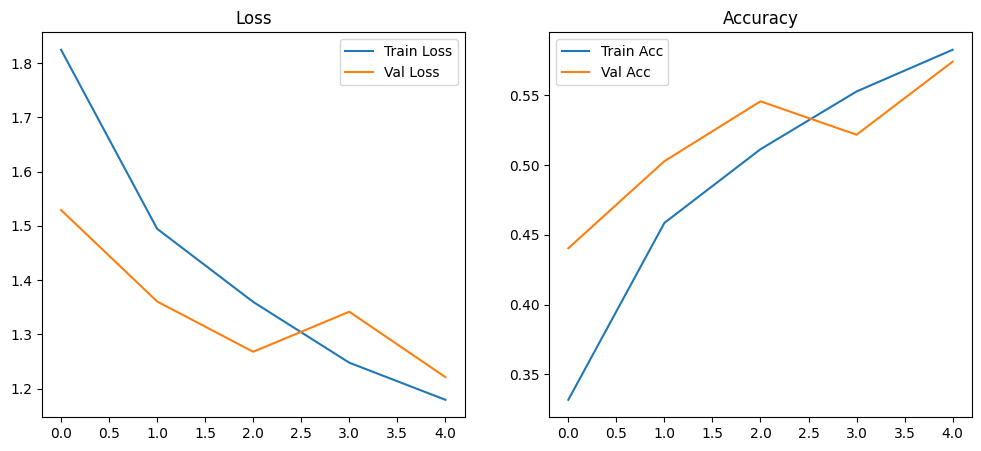

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# -----------------------------
# 1) LOAD CSV FILES
# -----------------------------
train_df = pd.read_csv("train_data.csv")
test_df  = pd.read_csv("test_data.csv")

train_df = train_df.dropna();
test_df = test_df.dropna();

# -----------------------------
# 2) SPLIT FEATURES & LABELS
# last column = label
# first 3072 columns = pixels
# -----------------------------
y_train = train_df.iloc[:, -1].values
X_train = train_df.iloc[:, :-1].values

y_test = test_df.iloc[:, -1].values
X_test = test_df.iloc[:, :-1].values

# -----------------------------
# 3) PREPROCESS
# normalize & reshape to 32x32x3
# -----------------------------
X_train = X_train.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0

X_train = X_train.reshape(-1, 32, 32, 3)
X_test  = X_test.reshape(-1, 32, 32, 3)

y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

# -----------------------------
# 4) DEFINE CNN MODEL
# -----------------------------
model = Sequential([
    # helps learn features from 2D images
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
     # reduces spatial dimensions (width, height)
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
# deflatten 2D images to 1D vectors
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# -----------------------------
# 5) TRAIN
# -----------------------------
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# -----------------------------
# 6) EVALUATE
# -----------------------------
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {acc:.4f} | Test Loss: {loss:.4f}")

# -----------------------------
# 7) PLOT
# -----------------------------
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.legend()
plt.title("Loss")

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.legend()
plt.title("Accuracy")

plt.show()


✅ 1. Core CNN Theory for CIFAR-10 (10 lines, technical)

CIFAR-10 contains 32×32 RGB images, so CNNs are ideal because they learn spatial and color patterns.

Convolution layers slide trainable filters over the image and extract features like edges, corners, textures, and object parts.

ReLU activation removes negative values, making training faster and avoiding vanishing gradients.

MaxPooling downsamples feature maps, reducing computation and preventing overfitting.

Multiple convolution blocks help the model learn low-level features (edges), mid-level (shapes), and high-level (object patterns).

Flatten converts 3D feature maps into 1D vectors for classification layers.

Dense layers act as decision layers based on extracted features.

Dropout randomly disables neurons, improving generalization and reducing overfitting.

Softmax outputs a probability distribution across 10 classes.

Adam optimizer adapts learning rate during training, achieving faster convergence on high-dimensional data like CIFAR-10.

✅ 2. Important Theory Points FROM YOUR CODE (viva-ready)
✅ Stage A — Loading & Preprocessing

train_df.dropna() removes corrupted rows from the CSV.

X_train = train_df.iloc[:, :-1] picks all pixel values (3072 per image).

y_train = train_df.iloc[:, -1] picks the label column.

Normalizing (÷255) keeps pixel values between 0 and 1 → stable gradient updates.

Reshaping to (32,32,3) restores colored image structure required by Conv2D.

to_categorical() converts labels 0–9 into one-hot vectors.

✅ Stage B — CNN Architecture
Conv Layer 1: Conv2D(32, 3×3)

Learns simple features like edges and color transitions.

MaxPooling2D(2×2)

Reduces image size → prevents overfitting and slows over-computation.

Conv Layer 2: Conv2D(64, 3×3)

Learns deeper features like corners, curves, textures.

Second MaxPooling2D

Further downsamples feature maps.

Flatten

Converts the convolution output into a single vector.

Dense(128, relu)

Learns high-level patterns for classification.

Dropout(0.3)

Disables 30% neurons randomly → prevents overfitting.

Dense(10, softmax)

Outputs probabilities for the 10 CIFAR-10 classes.

✅ Stage C — Training

Adam optimizer: Adaptive learning rate → fast & stable updates.

Categorical crossentropy: Standard loss for multi-class softmax.

Epochs = 5: CNN needs more, but good enough for assignment.

Batch size 32: Balanced training & GPU efficiency.

Validation split 0.2: Tracks generalization during training.

✅ Stage D — Evaluation

model.evaluate() gives final test loss & accuracy on unseen images.

Good accuracy means model successfully generalized.

✅ Stage E — Plots

Train vs Validation Loss → checks learning stability and overfitting.

Train vs Validation Accuracy → shows improvement across epochs.

If validation curves diverge → overfitting.

✅ 3. Why this CNN code is bigger than MNIST CNN code

CIFAR-10 is color (3-channel) vs MNIST grayscale (1-channel).

CIFAR-10 has more complex classes: cars, airplanes, dogs, horses, etc.

It needs more filters, deeper layers, and more parameters.

It needs more preprocessing because CSV format is flat 3072-dim vectors.

MNIST is easy; CIFAR-10 is a real-world dataset — tough and heavier.